# **Used Cars Price Prediction - Jacob Conklin**

## **Problem Definition**

### **The Context:**

 - Using machine learning and regression analysis is important for businesses because it provides predivitive power, efficiency, accuracy, personalization, and a competitive advantage over other businesses. Machine Learning algorithms can quickly and efficiently analyze large amounts of data to make informed decisions about future operationsm marketing campaigns, product development, and resource allocation. In this scenario, it is essential for a used car business to purchase vehicles at a low cost and sell them at a higher price to maximize their profits. 

### **The objective:**

 - The primary objective of utilizing machine learning/ regression is to identify the optimal algorithm that can precisely predict the future prices of used cars.

### **The key questions:**

- In this project, the pivotal questions that require answers revolve around identifying the variables, including both positive and negative factors, that impact the pricing of a used vehicle.  

### **The problem formulation**:

- Leveraging the power of machine learning/regression algorithms, which is a specialized area of data science, will enable the achievement of these objectives. 

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
#Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.ensemble import AdaBoostRegressor
abr = DecisionTreeRegressor()
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
import plotly.express as px
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings(action='ignore')

### **Let us load the data**

In [2]:
#Load Data
df = pd.read_csv(r"C:\Users\Conkl\OneDrive\Desktop\Applied Data Science - MIT\Final Project\used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
df.shape

(7253, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [7]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [8]:
print(df.dtypes)

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_price            float64
Price                float64
dtype: object


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

After exploring the data it is seen that the columns S.No. and New_Price aren’t needed so they will be removed. The Name category is a combination of make and model of the vehicles so I’ll separate those into two columns. The owner_type is a object that needs to be a int, so the column will be altered to fit this. The year column, all though is a int, needs to be better represented. So making the year 2019 be year zero, the column will be turned into years old. And using a label encoder the columns Location, fuel_type, transmission, model and manufacturer will be also turned into int’s. 


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

## Data Cleaning

In [9]:
#Drop columns S.No. and New_price. And drop any blank rows.
df.drop(columns = ['S.No.','New_price'], inplace=True)
df = df.dropna()

In [10]:
# The manufactor column is the combination of Name of vehicle and Model. Seperate them. 
df['Manufacturer']=df['Name'].map(lambda x: str(x).strip().split(" ")[0])

In [11]:
df['Model']=df['Name'].map(lambda x: str(x).strip().split(" ")[1])

In [12]:
df.drop(columns='Name',inplace=True)

In [13]:
#Turn object types into integer types.
label = LabelEncoder()
label_lst = ['Location', 'Fuel_Type','Transmission','Model','Manufacturer']
for col in label_lst : 
        df[col] = label.fit_transform(df[col])

In [14]:
#Change Owner Type into integers
dic = {'First':0,'Second':1,'Third':2,'Fouth & Above':3}

In [15]:
df['Owner_Type']=df['Owner_Type'].map(dic)

In [16]:
#Change years into "years old" and every vehicle older than 2003 is into its own column.
df['Year']=df['Year'].astype(str)

In [17]:
df['Year']=np.where(df['Year'].astype(int)<2003,"less than 2003",df['Year'])

In [18]:
dic1 = {'2019':0,"2018":1,"2017":2,"2016":3,"2015":4,"2014":5,"2013":6,"2012":7,"2011":8,"2010":9,"2009":10,"2008":11,"2007":12,"2006":13,"2005":14,"2004":15,"2003":16,"less than 2003":17 }

In [19]:
df['Year']=df['Year'].map(dic1)

In [20]:
df = df.dropna()

In [21]:
#Recheck Data and values
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Model
0,9,9,72000,0,1,0.0,26.60,998.0,58.16,5.0,1.75,18,180
1,10,4,41000,1,1,0.0,19.67,1582.0,126.20,5.0,12.50,10,51
2,2,8,46000,3,1,0.0,18.20,1199.0,88.70,5.0,4.50,9,94
3,2,7,87000,1,1,0.0,20.77,1248.0,88.76,7.0,6.00,18,66
4,3,6,40670,1,0,1.0,15.20,1968.0,140.80,5.0,17.74,1,9


In [22]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Manufacturer         0
Model                0
dtype: int64

In [23]:
df.describe()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Model
count,5865.000000,5865.000000,5.865000e+03,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000
mean,5.614493,5.510315,5.823829e+04,1.896675,0.709974,0.192157,18.283490,1625.430861,113.286687,5.282864,9.611124,15.187212,102.818926
std,2.949072,3.138776,9.215378e+04,1.007931,0.453813,0.435553,4.364158,601.598315,53.901221,0.804121,11.254145,7.828661,62.730842
min,0.000000,0.000000,1.710000e+02,0.000000,0.000000,0.000000,0.000000,624.000000,34.200000,2.000000,0.440000,0.000000,0.000000
25%,3.000000,3.000000,3.337200e+04,1.000000,0.000000,0.000000,15.290000,1198.000000,75.000000,5.000000,3.530000,9.000000,49.000000
50%,6.000000,5.000000,5.251600e+04,1.000000,1.000000,0.000000,18.250000,1495.000000,97.700000,5.000000,5.750000,17.000000,94.000000
75%,8.000000,7.000000,7.220200e+04,3.000000,1.000000,0.000000,21.100000,1985.000000,138.100000,5.000000,10.050000,19.000000,160.000000
max,10.000000,17.000000,6.500000e+06,3.000000,1.000000,2.000000,33.540000,5998.000000,560.000000,10.000000,160.000000,29.000000,202.000000


In [24]:
print(df.dtypes)

Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type           float64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Manufacturer           int32
Model                  int32
dtype: object


Text(0.5, 1.0, 'Correlation Graph')

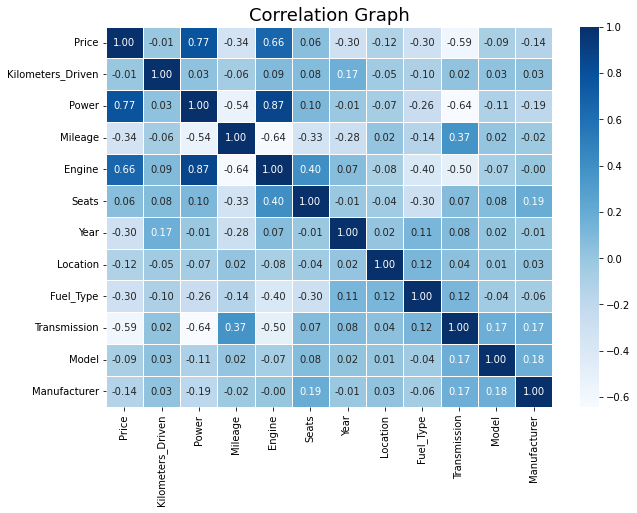

In [25]:
#Check for correlations 
plt.figure(figsize=(10,7))
sns.heatmap(df[["Price","Kilometers_Driven","Power","Mileage","Engine","Seats","Year", 'Location', 'Fuel_Type','Transmission','Model','Manufacturer']].corr(), cmap='Blues', annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

In [26]:
highcorrs = ['Price', 'Power', 'Engine', 'Mileage', 'Year']
summary = df[highcorrs].describe().round(2)
print (summary)

         Price    Power   Engine  Mileage     Year
count  5865.00  5865.00  5865.00  5865.00  5865.00
mean      9.61   113.29  1625.43    18.28     5.51
std      11.25    53.90   601.60     4.36     3.14
min       0.44    34.20   624.00     0.00     0.00
25%       3.53    75.00  1198.00    15.29     3.00
50%       5.75    97.70  1495.00    18.25     5.00
75%      10.05   138.10  1985.00    21.10     7.00
max     160.00   560.00  5998.00    33.54    17.00


<Figure size 1440x720 with 0 Axes>

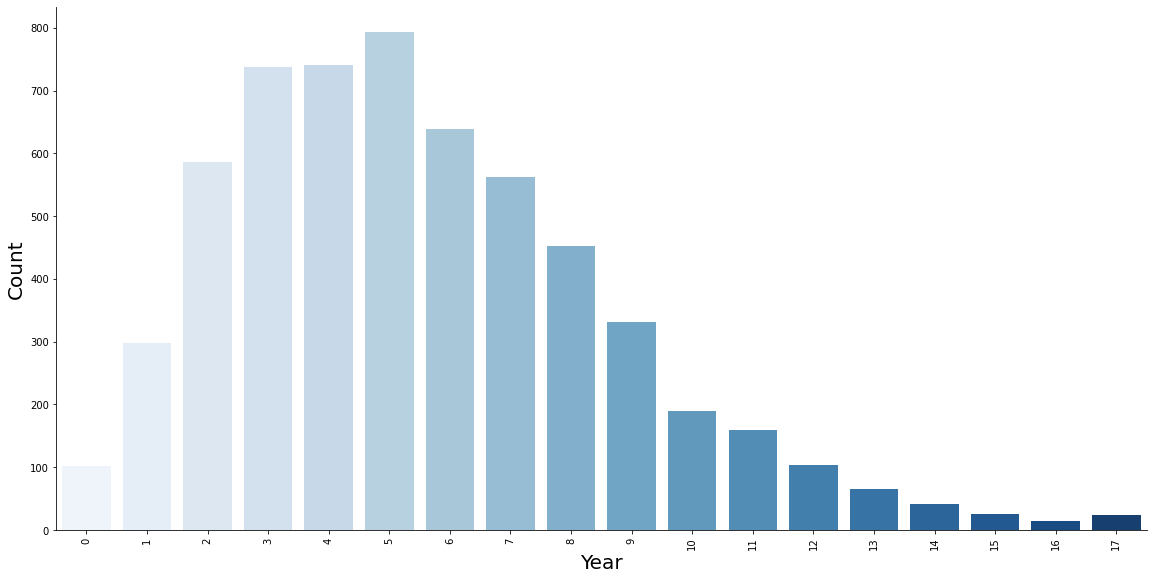

<Figure size 1440x720 with 0 Axes>

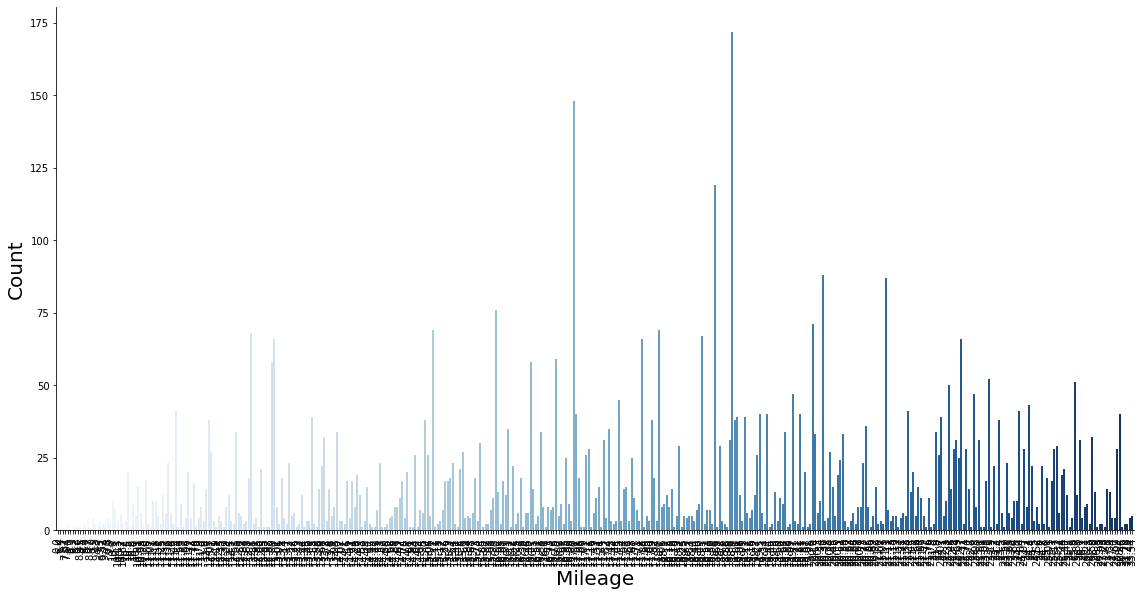

<Figure size 1440x720 with 0 Axes>

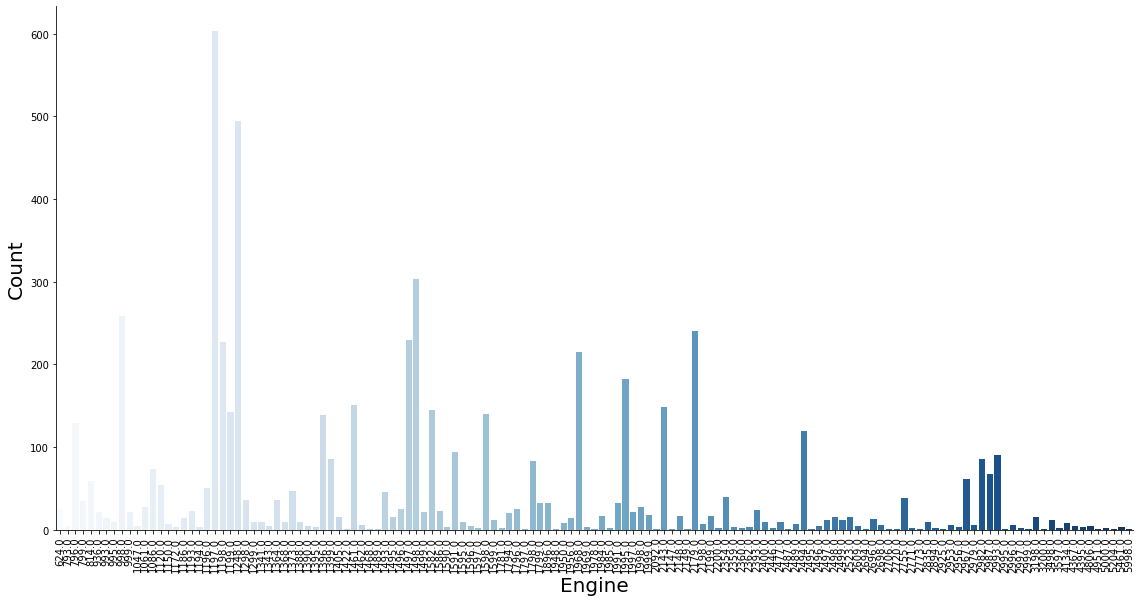

<Figure size 1440x720 with 0 Axes>

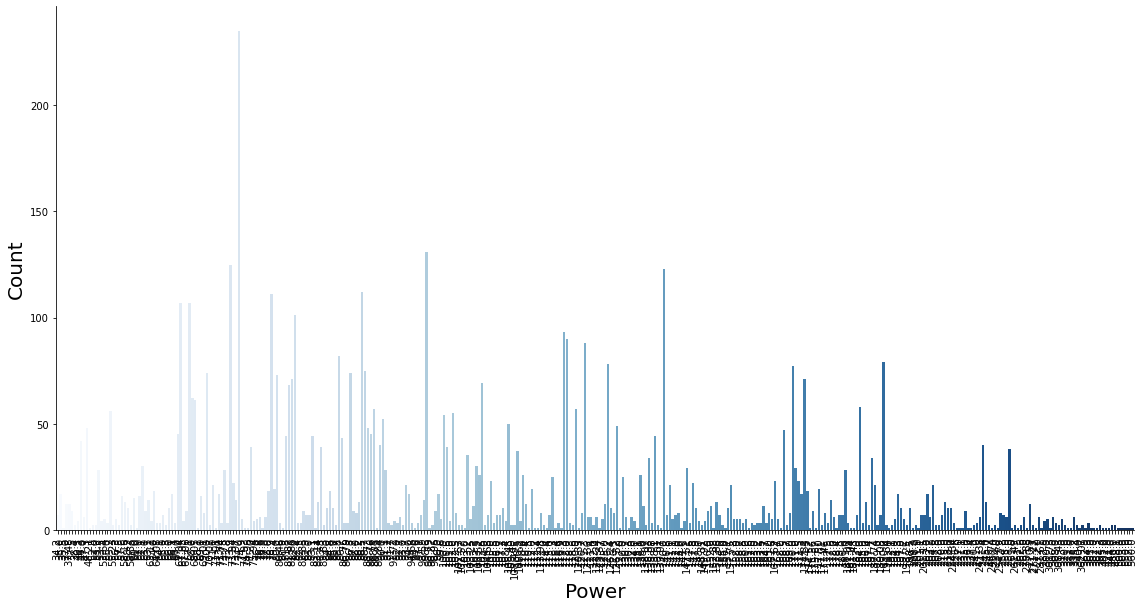

<Figure size 1440x720 with 0 Axes>

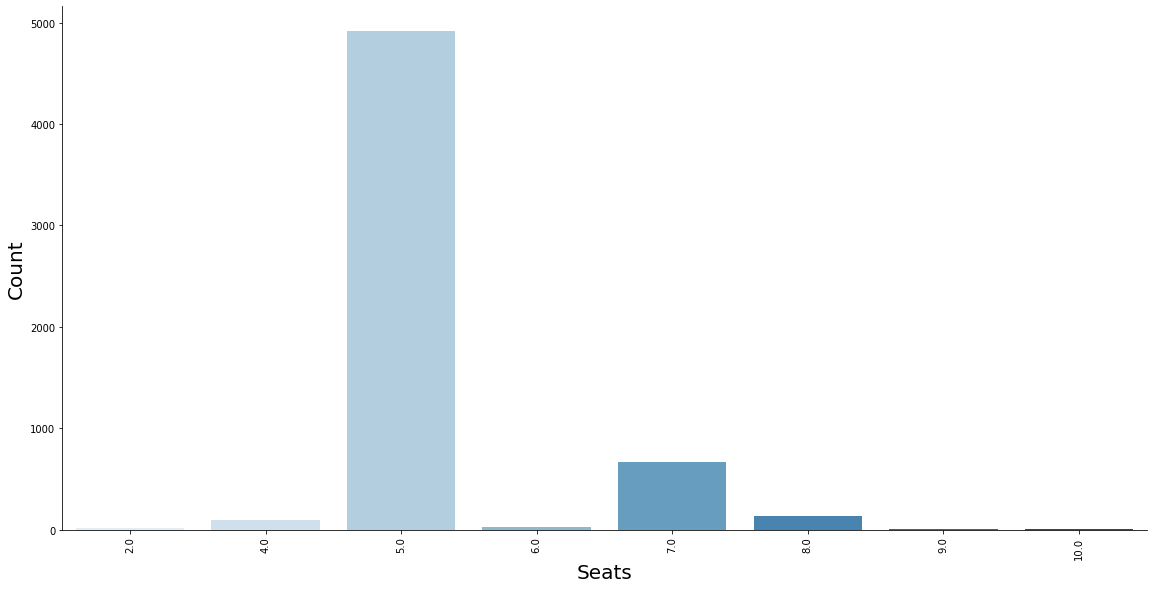

<Figure size 1440x720 with 0 Axes>

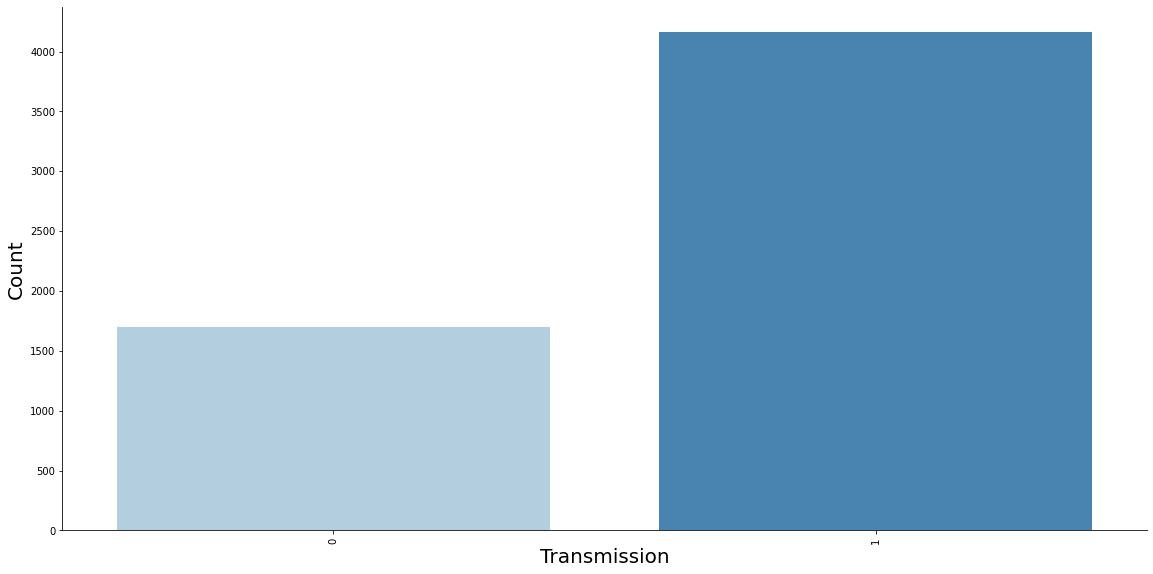

In [27]:
vars = ['Year', 'Mileage', 'Engine', 'Power', 'Seats', 'Transmission']
for var in vars:
    plt.figure(figsize=(20, 10))
    sns.catplot(x=var, kind="count", palette="Blues", height=8, aspect=2, data=df);
    plt.xticks(rotation=90);
    plt.xlabel(var, size=20)
    plt.ylabel('Count', size=20)
    plt.show()

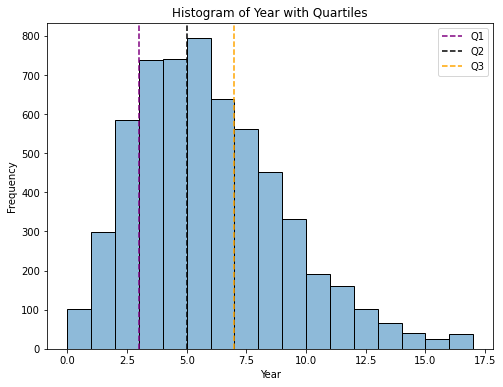

In [28]:
year_q1 = 3.00
year_median = 5.00
year_q3 = 7.00

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Year', bins=17, palette ="Blues", alpha=0.5)
plt.axvline(x=year_q1, color='purple', linestyle='--', label='Q1')
plt.axvline(x=year_median, color='black', linestyle='--', label='Q2')
plt.axvline(x=year_q3, color='orange', linestyle='--', label='Q3')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year with Quartiles')
plt.legend()
plt.show()

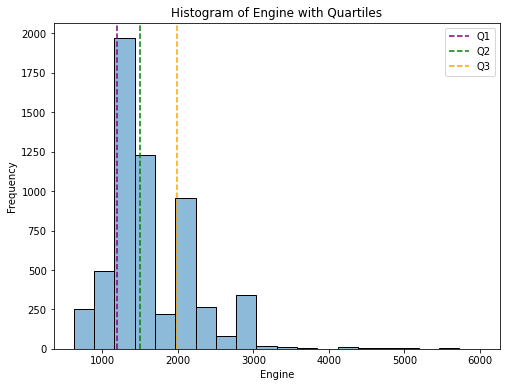

In [29]:
engine_q1 = 1198.00
engine_median = 1495.00
engine_q3 = 1985.00

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Engine', bins=20, palette="Blues", alpha=0.5)
plt.axvline(x=engine_q1, color='purple', linestyle='--', label='Q1')
plt.axvline(x=engine_median, color='green', linestyle='--', label='Q2')
plt.axvline(x=engine_q3, color='orange', linestyle='--', label='Q3')
plt.xlabel('Engine')
plt.ylabel('Frequency')
plt.title('Histogram of Engine with Quartiles')
plt.legend()
plt.show()

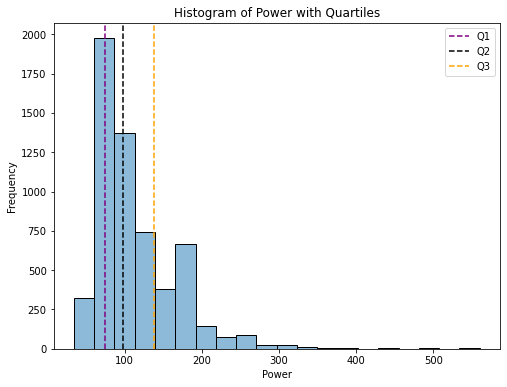

In [30]:
power_q1 = 75.00
power_median = 97.70
power_q3 = 138.10

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Power', bins=20, palette="Blues", alpha=0.5)
plt.axvline(x=power_q1, color='purple', linestyle='--', label='Q1')
plt.axvline(x=power_median, color='black', linestyle='--', label='Q2')
plt.axvline(x=power_q3, color='orange', linestyle='--', label='Q3')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Histogram of Power with Quartiles')
plt.legend()
plt.show()

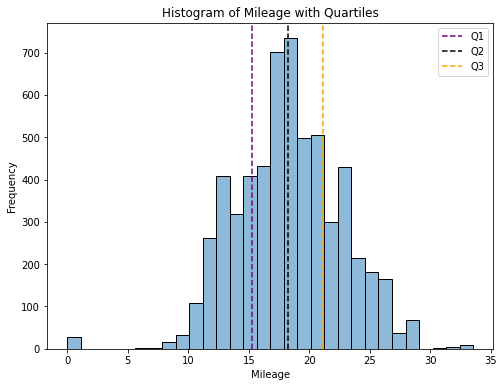

In [31]:
mileage_q1 = 15.29
mileage_median = 18.25
mileage_q3 = 21.10

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Mileage', bins=30, palette ="Blues", alpha=0.5)
plt.axvline(x=mileage_q1, color='purple', linestyle='--', label='Q1')
plt.axvline(x=mileage_median, color='black', linestyle='--', label='Q2')
plt.axvline(x=mileage_q3, color='orange', linestyle='--', label='Q3')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Histogram of Mileage with Quartiles')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Price'>

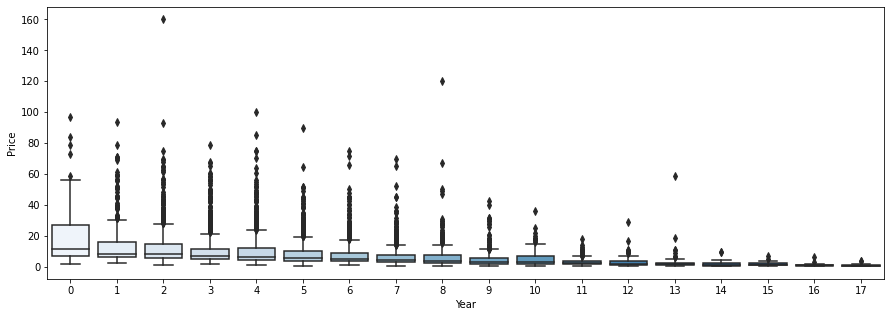

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Year',y='Price',data=df, palette='Blues') 

<AxesSubplot:xlabel='Engine', ylabel='Price'>

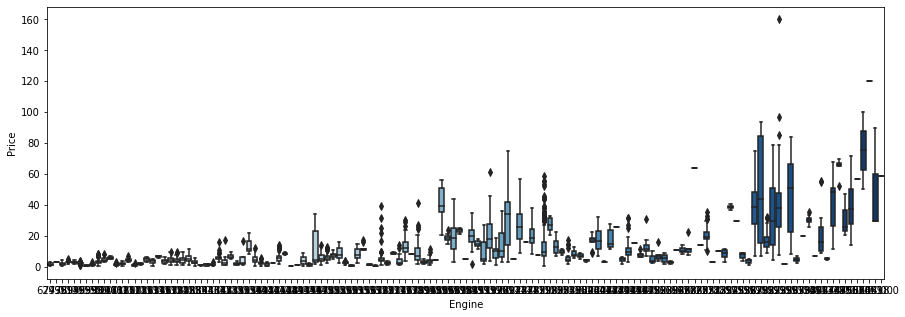

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Engine',y='Price',data=df, palette='Blues') 

<AxesSubplot:xlabel='Power', ylabel='Price'>

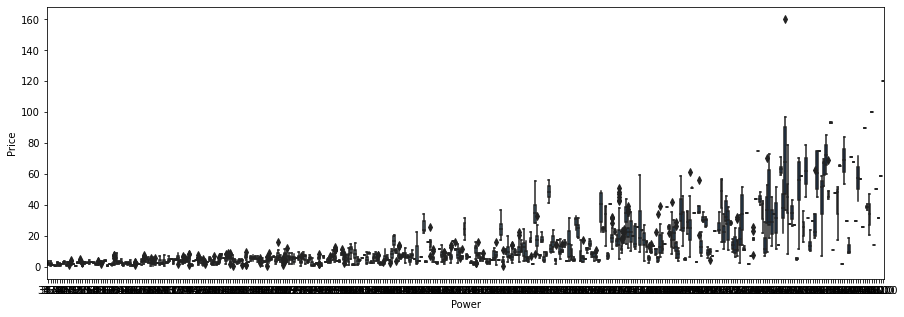

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Power',y='Price',data=df, palette='Blues') 

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

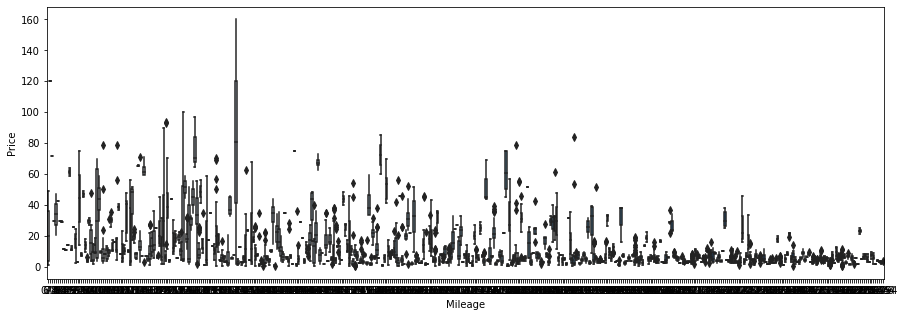

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Mileage',y='Price',data=df, palette='Blues') 

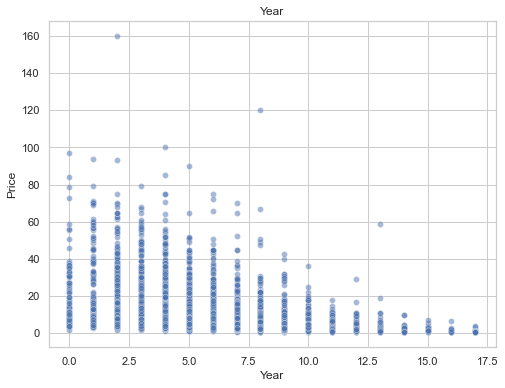

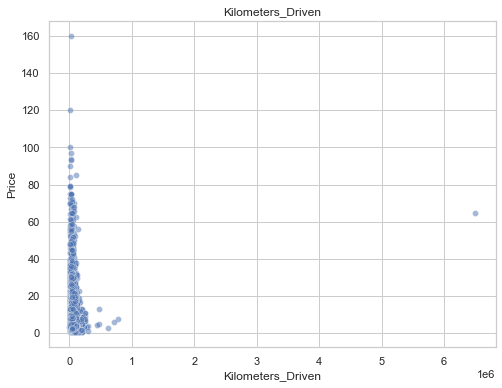

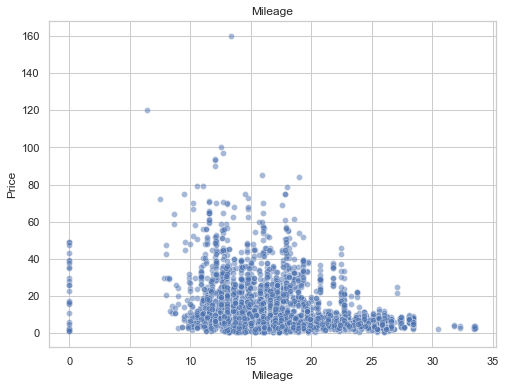

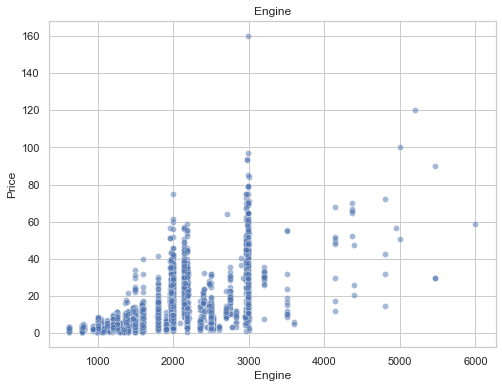

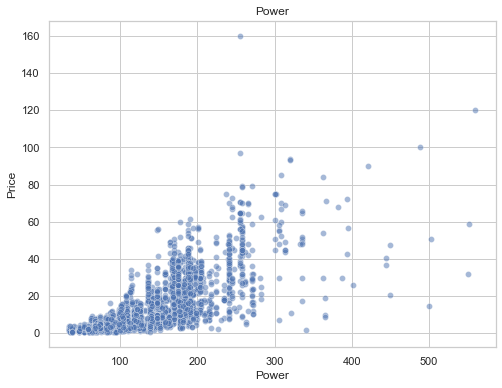

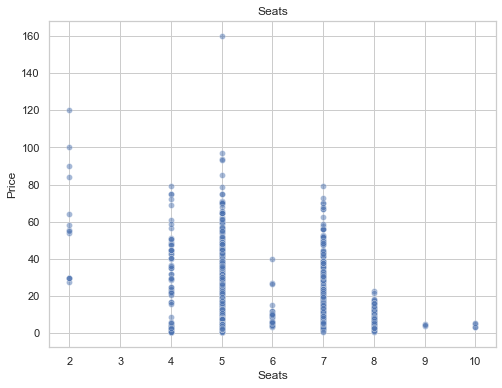

In [36]:
cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

for col in cols:
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['Price'], alpha=0.5, palette='Blues')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col)
    plt.show()

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

The correlation graph and various plots depict a comprehensive view of the factors affecting vehicle pricing, both positively and negatively. Amoung the key positive variables that significantly impact the price are power and engine. On the other hand, the main negative variables that contribute to a lower price are mileage and year. Notably, the impact of the positive variables outweighs that of the negative variable, thus indicating their strong correlation with vehicle pricing. 

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

The name column was was split into "Manufacturer" and "Model" during the data cleaning stage. 

### **Missing value treatment**

The handling of missing data was carried out prior to generating the correlation and plots, in order to ensure that decisions were not made based on incomplete data. 

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [37]:
# Split the data into training and test sets (70/30)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=5)

In [38]:
X_train = train_df.drop("Price",axis=1)  
Y_train= train_df['Price']                
X_test = test_df.drop("Price",axis=1)  
Y_test= test_df['Price']             

In [39]:
lasso = Lasso()

In [40]:
lasso.fit(X_train,Y_train)

Lasso()

In [41]:
#Run regression models
regression_models = [lr, rfr, gbr, dtr, abr, lasso]
score_train = []
score_test = []
rmse = []

for model in regression_models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train, Y_train))
    score_test.append(model.score(X_test, Y_test))
    rmse.append(np.sqrt(mean_squared_error(Y_test, y_pred)))

In [42]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor','Lasso Regression']

scores = pd.DataFrame([model_names,score_train,score_test,rmse])
scores

,0,1,2,3,4,5
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor,Lasso Regression
1,0.70009,0.982583,0.938712,0.999997,0.999997,0.684882
2,0.706071,0.91957,0.917341,0.826126,0.806646,0.682288
3,5.791307,3.02946,3.071153,4.454238,4.697132,6.021054


In [43]:
#Rotate scores to make easier to compare
scores = scores.transpose()
scores.columns = [ 'Model','Training set Accuracy','Testing set Accuracy','RMSE']
scores

,Model,Training set Accuracy,Testing set Accuracy,RMSE
0,Linear Regression,0.70009,0.706071,5.791307
1,Random Forest Regressor,0.982583,0.91957,3.02946
2,Gradient Boosting Regressor,0.938712,0.917341,3.071153
3,Decision Tree Regressor,0.999997,0.826126,4.454238
4,AdaBoostRegressor,0.999997,0.806646,4.697132
5,Lasso Regression,0.684882,0.682288,6.021054


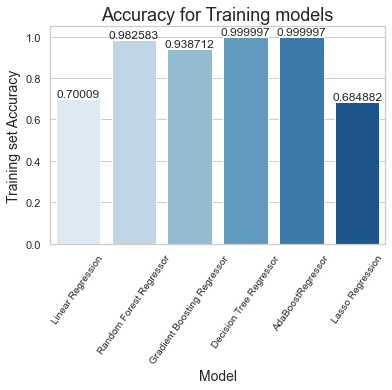

In [44]:
#Graph Training model data 
sns.barplot(data=scores, x='Model', y='Training set Accuracy', palette='Blues')
plt.title('Accuracy for Training models', size=18)
plt.xticks(rotation=55,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Training set Accuracy',size=14)

ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge')


plt.show()

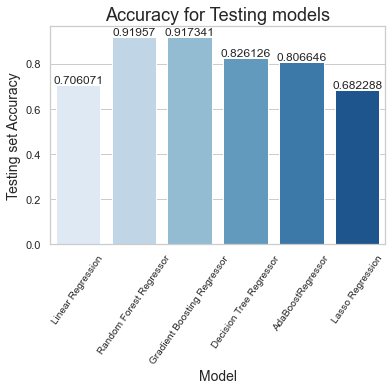

In [45]:
#Graph Testing model data 
sns.barplot(data=scores, x='Model', y='Testing set Accuracy', palette='Blues')
plt.title('Accuracy for Testing models', size=18)
plt.xticks(rotation=55,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Testing set Accuracy',size=14)

ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge')


plt.show()

In [46]:
print("Feature importance for each feature in Random Forest Regression:")
for i in range(len(rfr.feature_importances_)):
    print(f"{X_train.columns[i]}: {rfr.feature_importances_[i]:.2f}")

Feature importance for each feature in Random Forest Regression:
Location: 0.02
Year: 0.15
Kilometers_Driven: 0.05
Fuel_Type: 0.00
Transmission: 0.01
Owner_Type: 0.00
Mileage: 0.02
Engine: 0.03
Power: 0.66
Seats: 0.01
Manufacturer: 0.03
Model: 0.02


In [47]:
print("Feature importance for each feature in Gradient Boosting Regression:")
for i in range(len(gbr.feature_importances_)):
    print(f"{X_train.columns[i]}: {gbr.feature_importances_[i]:.2f}")

Feature importance for each feature in Gradient Boosting Regression:
Location: 0.01
Year: 0.15
Kilometers_Driven: 0.04
Fuel_Type: 0.01
Transmission: 0.02
Owner_Type: 0.00
Mileage: 0.01
Engine: 0.04
Power: 0.69
Seats: 0.00
Manufacturer: 0.02
Model: 0.01


### **Hyperparameter Tuning: Decision Tree**

In [48]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dtr, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [49]:
dtr_best = DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=5)

dtr_best.fit(X_train, Y_train)

y_pred = dtr_best.predict(X_test)

score_train = dtr_best.score(X_train, Y_train)
score_test = dtr_best.score(X_test, Y_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.9484
Test score: 0.8356
RMSE: 4.33


### **Hyperparameter Tuning: Random Forest**

In [50]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [51]:
best_params = {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

rfr_best = RandomForestRegressor(**best_params)

rfr_best.fit(X_train, Y_train)

y_pred = rfr_best.predict(X_test)

score_train = rfr_best.score(X_train, Y_train)
score_test = rfr_best.score(X_test, Y_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(f"Train score: {score_train:.4f}")
print(f"Test score: {score_test:.4f}")
print(f"RMSE: {rmse:.2f}")

Train score: 0.9621
Test score: 0.9176
RMSE: 3.07


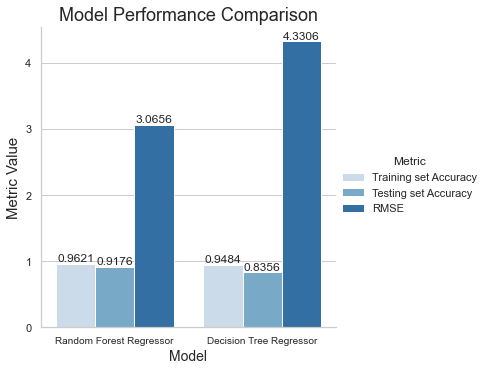

In [52]:
results = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Decision Tree Regressor'],
    'Training set Accuracy': [round(rfr_best.score(X_train, Y_train), 4), round(dtr_best.score(X_train, Y_train), 4)],
    'Testing set Accuracy': [round(rfr_best.score(X_test, Y_test), 4), round(dtr_best.score(X_test, Y_test), 4)],
    'RMSE': [round(np.sqrt(mean_squared_error(Y_test, rfr_best.predict(X_test))), 4), round(np.sqrt(mean_squared_error(Y_test, dtr_best.predict(X_test))), 4)]
})

# Melt the dataframe to long format
melted_results = pd.melt(results, id_vars='Model', var_name='Metric', value_name='Value')

# Create a bar plot
sns.catplot(data=melted_results, x='Model', y='Value', hue='Metric', kind='bar', palette='Blues')
plt.title('Model Performance Comparison', size=18)
plt.xticks(rotation=0,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Metric Value',size=15)

ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge')


plt.show()

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 


The initial performance of the random forest model before hyperparameter tuning was impressive, achieving 0.982646 accuracy in training and 0.917694 in testing, indicating a significant model. However, after tuning, the accuracy decreased slightly in testing to 0.911234 but improved in training to 0.965495. This decrease in testing accuracy may suggest a reduction in overfitting, which could be confirmed with additional data. Notably, the RMSE values between the two tests differed with the tuning being slightly worst. 

In contrast, the decision tree model showed poor performance initially, with a high training accuracy of 0.999997 indicating overfitting, and a low testing accuracy of 0.821581, making it a poor choice for modeling. After hyperparameter tuning, the model significantly improved with a testing accuracy of 0.94843 and a testing accuracy of 0.834993. Despite this improvement, the random forest model still outperformed the decision tree model as evidenced by its RMSE values of 3.18 verses 4.34.



**2. Refined insights:** 

From this problem, it is apparent that tuning models can improve their performance, but it does not necassarily guarantee that they will become the best model available. This suggests that it is crucial to evaluate various models and choose the most suitable one for the problem at hand. 

**3. Proposal for the final solution design:** 

After evaluating different models for the task of pricing used cars, the random forest regressor before hyperparameter tuning stands out as the best choice. This model exhibits a high training value, indicating a good performance on the training data, but not so high as to suggest overfitting. Furthermore, it has an impressive testing value, indicating that it can generalize well to new data. Additionally, This model has the lowest RMSE values among the group of models, further supporting its superiority. 

Although the random forest model after hyperparameter tuning may show slight improvements, it is essential to acquire further data to confirm this. As of now, the random forest regressor before tuning is the top-performing model for the task of pricing used cars.


**4. Final thoughts:** 
    
Based on the results of the random forest regression model, there are several key recommendations that can be made to implement the solution. Firstly, it is important to collect and maintain high-quality data to ensure the accuracy of the model. Additionally, continuous monitoring and updating of the model will help to improve its performance over time. Stakeholders can benefit from the model by utilizing it to make informed decisions regarding the pricing and sale of used cars, leading to increased profits and customer satisfaction. 

However, there is also potential costs and risks associated with implementing the model. For example, there may be costs associated with collecting and maintaining high-quality data, as well as the initial investment required to set up the model. Additionally, there may be potential risks in relying solely on the models’ predictions and not taking into account other factors that may influence the pricing and sale of used cars. For example, cars from the northeast United States may have under carriage damage from salt deposits or the model will not quickly identify serious recalls from manufactures. Further analysis may be needed to explore other factors that may impact the pricing and sale of used cars. 


    
    